# Long Term Open Source Metric Analysis

# Kafka Analysis

In [1]:
kafka_versions = ["3.4.1","3.4.0","3.3.2","3.3.1",
                "3.2.3","3.2.1","3.2.0","3.1.2","3.1.1","3.1.0","3.0.2","3.0.1","3.0.0",
                "2.8.2","2.8.1","2.8.0","2.7.2","2.7.1","2.7.0","2.6.3","2.6.2","2.6.1",
                "2.6.0","2.5.1","2.5.0","2.4.1","2.4.0","2.3.1","2.3.0",
                "2.2.2","2.2.1","2.2.0","2.1.1","2.1.0","2.0.1","2.0.0","1.1.1","1.1.0",
                "1.0.2","1.0.1","1.0.0","0.11.0.3","0.11.0.2","0.11.0.1","0.11.0.0",
                "0.10.2.2","0.10.2.1","0.10.2.0","0.10.1.1","0.10.1.0","0.10.0.0",
                "0.9.0.1","0.9.0.0","0.8.2.2","0.8.2.1","0.8.2.0","0.8.1.9",
                "0.8.1.1","0.8.1","0.8.0","0.7.9"
            ]


neededColumnsClass =['cbo','cboModified','fanin','fanout','wmc','dit','noc','lcom',
                     'lcom*','tcc','lcc', 'loc'
               ]
print (len(kafka_versions))

61


In [2]:
import pandas as pd

classCkMetricsAllVersionsDfClass = pd.read_csv('DataSource/kafka_AllCkMetricsAllVersionsClass.csv')

In [3]:
kafka_bugsNewFeatureImprovementsDf = pd.read_csv('DataSource/kafka_bugsNewFeatureImprovements.csv')

In [4]:
cleanedCkMetricsAllVersionsDf = (classCkMetricsAllVersionsDfClass
    .loc[~classCkMetricsAllVersionsDfClass['class'].str.contains("Test")]
    .loc[~classCkMetricsAllVersionsDfClass['class'].str.contains("test")]
    .loc[~classCkMetricsAllVersionsDfClass['class'].str.contains("TEST")]
    .loc[~classCkMetricsAllVersionsDfClass['file'].str.contains("src/test/")]
) 

In [5]:
print("Filtered class count:", cleanedCkMetricsAllVersionsDf.shape[0])
print("Versioned bug count:", kafka_bugsNewFeatureImprovementsDf['ResolvedBug'].sum())
print("Versioned new feature count:", kafka_bugsNewFeatureImprovementsDf['New_Feature'].sum())
print("Versioned improvement count:", kafka_bugsNewFeatureImprovementsDf['Improvement'].sum())


Filtered class count: 142536
Versioned bug count: 4162
Versioned new feature count: 143
Versioned improvement count: 1473


In [6]:
meanCkGroupedVersions = cleanedCkMetricsAllVersionsDf.groupby("Version", as_index=False)[neededColumnsClass].mean()
stdCkGroupedVersions = cleanedCkMetricsAllVersionsDf.groupby("Version", as_index=False)[neededColumnsClass].std()
maxCkGroupedVersions = cleanedCkMetricsAllVersionsDf.groupby("Version", as_index=False)[neededColumnsClass].max()

In [7]:
def calculate_value(version):
    parts = version.split('.')  # Sürüm numarasını "." karakterine göre ayır
    # Sürüm numarasını belirtilen formata göre birleştir
    if len(parts) == 3:
        numeric = float(f"{parts[0]}.{parts[1]}{parts[2]}")
    elif len(parts) == 4:
        numeric = float(f"{parts[0]}.{parts[1]}{parts[2]}{parts[3]}")
    else:
        return "Geçersiz sürüm numarası"

    return numeric

meanCkGroupedVersions['numericVersion'] = meanCkGroupedVersions['Version'].apply(calculate_value)
stdCkGroupedVersions['numericVersion'] = stdCkGroupedVersions['Version'].apply(calculate_value)
maxCkGroupedVersions['numericVersion'] = maxCkGroupedVersions['Version'].apply(calculate_value)

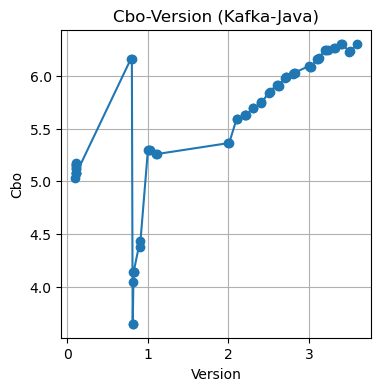

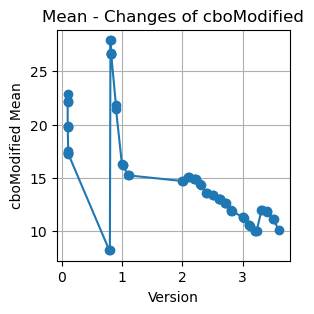

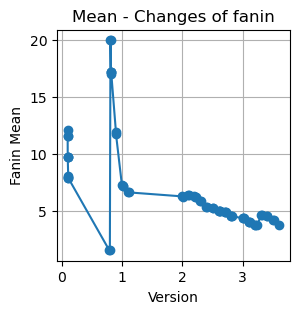

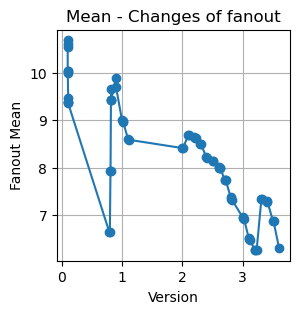

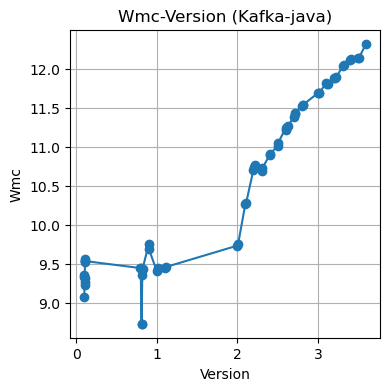

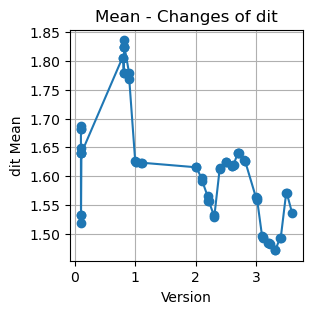

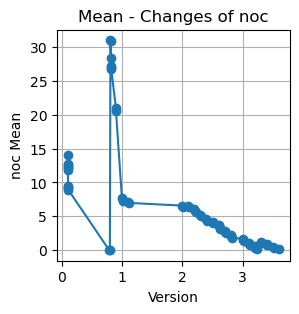

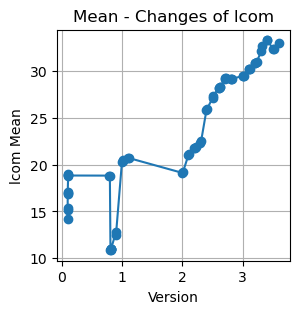

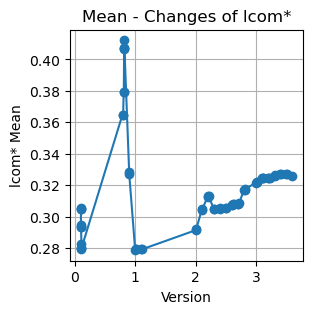

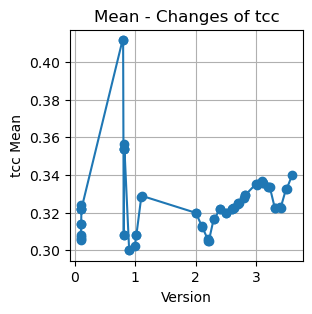

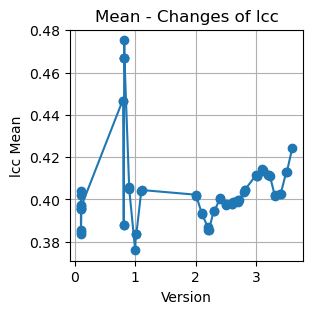

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4)) 
plt.plot(meanCkGroupedVersions['numericVersion'], meanCkGroupedVersions['cbo'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('Cbo')
plt.title('Cbo-Version (Kafka-Java)')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(meanCkGroupedVersions['numericVersion'], meanCkGroupedVersions['cboModified'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('cboModified Mean')
plt.title('Mean - Changes of cboModified')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(meanCkGroupedVersions['numericVersion'], meanCkGroupedVersions['fanin'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('Fanin Mean')
plt.title('Mean - Changes of fanin')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(meanCkGroupedVersions['numericVersion'], meanCkGroupedVersions['fanout'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('Fanout Mean')
plt.title('Mean - Changes of fanout')
plt.grid(True)
plt.show()

plt.figure(figsize=(4, 4)) 
plt.plot(meanCkGroupedVersions['numericVersion'], meanCkGroupedVersions['wmc'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('Wmc')
plt.title('Wmc-Version (Kafka-java)')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(meanCkGroupedVersions['numericVersion'], meanCkGroupedVersions['dit'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('dit Mean')
plt.title('Mean - Changes of dit')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(meanCkGroupedVersions['numericVersion'], meanCkGroupedVersions['noc'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('noc Mean')
plt.title('Mean - Changes of noc')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(meanCkGroupedVersions['numericVersion'], meanCkGroupedVersions['lcom'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('lcom Mean')
plt.title('Mean - Changes of lcom')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(meanCkGroupedVersions['numericVersion'], meanCkGroupedVersions['lcom*'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('lcom* Mean')
plt.title('Mean - Changes of lcom*')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(meanCkGroupedVersions['numericVersion'], meanCkGroupedVersions['tcc'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('tcc Mean')
plt.title('Mean - Changes of tcc')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(meanCkGroupedVersions['numericVersion'], meanCkGroupedVersions['lcc'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('lcc Mean')
plt.title('Mean - Changes of lcc')
plt.grid(True)
plt.show()

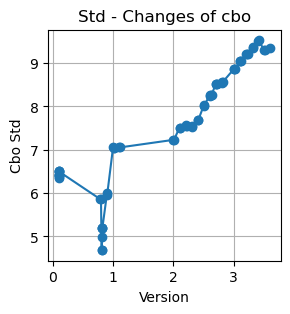

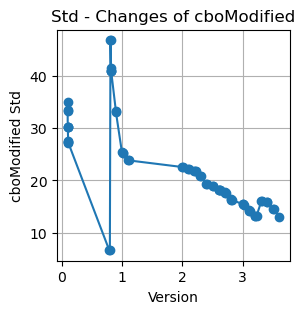

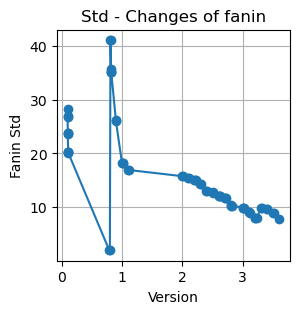

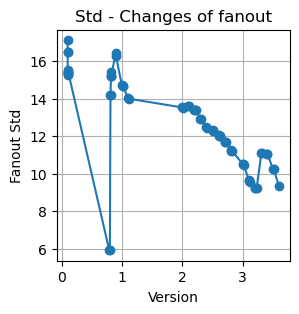

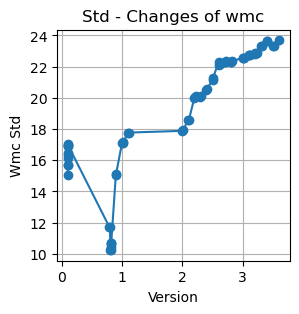

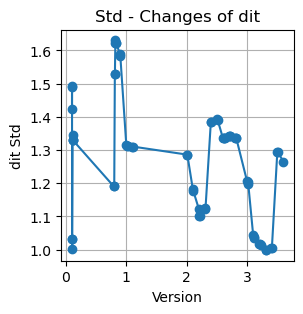

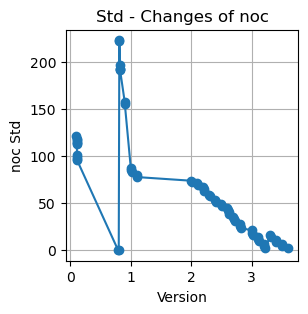

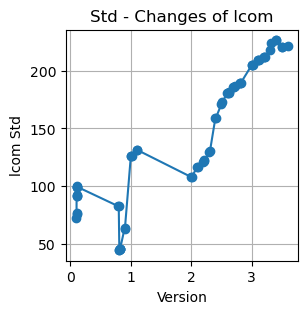

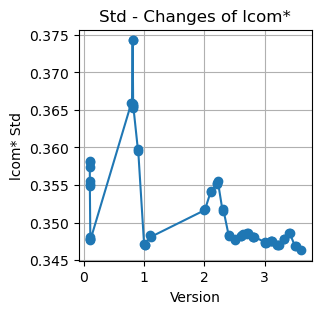

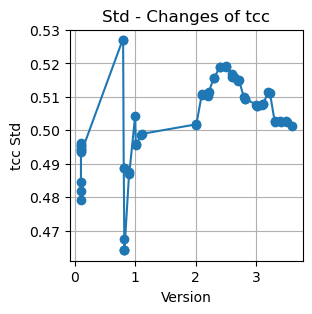

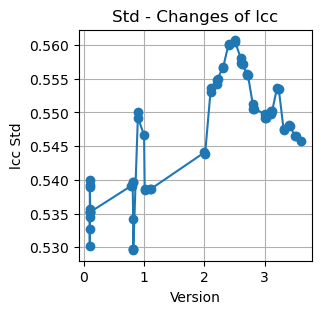

In [9]:
plt.figure(figsize=(3, 3)) 
plt.plot(stdCkGroupedVersions['numericVersion'], stdCkGroupedVersions['cbo'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('Cbo Std')
plt.title('Std - Changes of cbo')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(stdCkGroupedVersions['numericVersion'], stdCkGroupedVersions['cboModified'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('cboModified Std')
plt.title('Std - Changes of cboModified')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(stdCkGroupedVersions['numericVersion'], stdCkGroupedVersions['fanin'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('Fanin Std')
plt.title('Std - Changes of fanin')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(stdCkGroupedVersions['numericVersion'], stdCkGroupedVersions['fanout'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('Fanout Std')
plt.title('Std - Changes of fanout')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(stdCkGroupedVersions['numericVersion'], stdCkGroupedVersions['wmc'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('Wmc Std')
plt.title('Std - Changes of wmc')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(stdCkGroupedVersions['numericVersion'], stdCkGroupedVersions['dit'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('dit Std')
plt.title('Std - Changes of dit')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(stdCkGroupedVersions['numericVersion'], stdCkGroupedVersions['noc'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('noc Std')
plt.title('Std - Changes of noc')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(stdCkGroupedVersions['numericVersion'], stdCkGroupedVersions['lcom'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('lcom Std')
plt.title('Std - Changes of lcom')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(stdCkGroupedVersions['numericVersion'], stdCkGroupedVersions['lcom*'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('lcom* Std')
plt.title('Std - Changes of lcom*')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(stdCkGroupedVersions['numericVersion'], stdCkGroupedVersions['tcc'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('tcc Std')
plt.title('Std - Changes of tcc')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(stdCkGroupedVersions['numericVersion'], stdCkGroupedVersions['lcc'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('lcc Std')
plt.title('Std - Changes of lcc')
plt.grid(True)
plt.show()

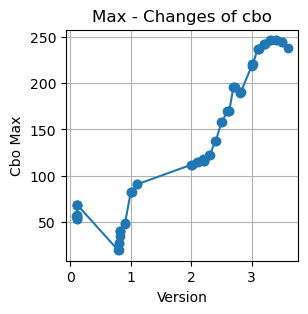

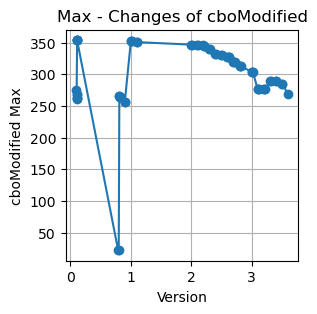

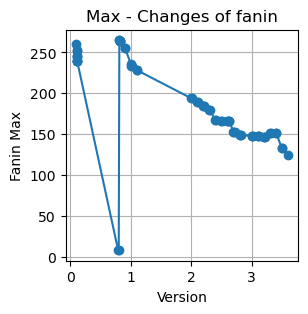

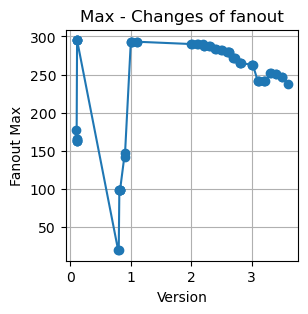

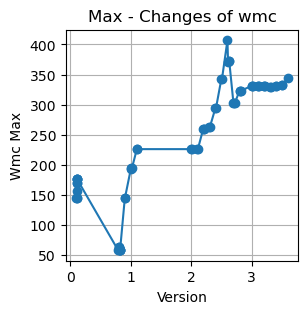

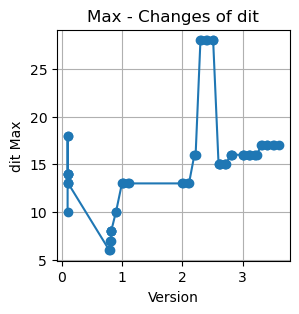

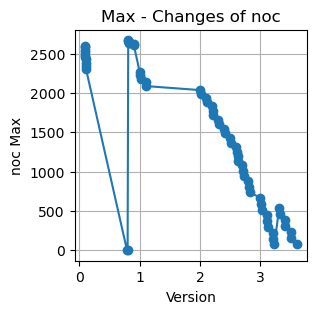

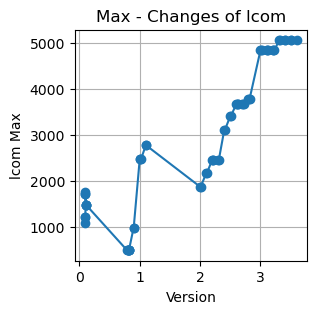

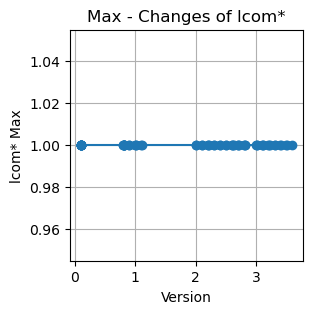

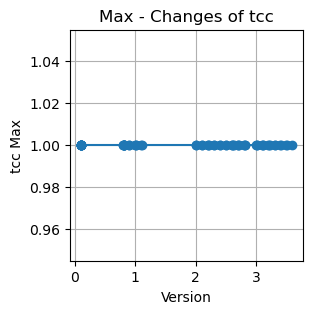

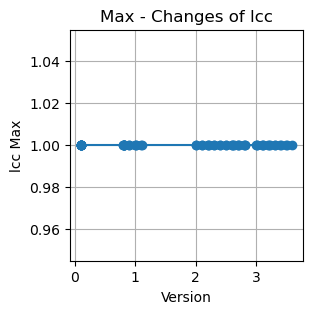

In [10]:
plt.figure(figsize=(3, 3)) 
plt.plot(maxCkGroupedVersions['numericVersion'], maxCkGroupedVersions['cbo'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('Cbo Max')
plt.title('Max - Changes of cbo')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(maxCkGroupedVersions['numericVersion'], maxCkGroupedVersions['cboModified'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('cboModified Max')
plt.title('Max - Changes of cboModified')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(maxCkGroupedVersions['numericVersion'], maxCkGroupedVersions['fanin'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('Fanin Max')
plt.title('Max - Changes of fanin')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(maxCkGroupedVersions['numericVersion'], maxCkGroupedVersions['fanout'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('Fanout Max')
plt.title('Max - Changes of fanout')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(maxCkGroupedVersions['numericVersion'], maxCkGroupedVersions['wmc'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('Wmc Max')
plt.title('Max - Changes of wmc')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(maxCkGroupedVersions['numericVersion'], maxCkGroupedVersions['dit'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('dit Max')
plt.title('Max - Changes of dit')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(maxCkGroupedVersions['numericVersion'], maxCkGroupedVersions['noc'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('noc Max')
plt.title('Max - Changes of noc')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(maxCkGroupedVersions['numericVersion'], maxCkGroupedVersions['lcom'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('lcom Max')
plt.title('Max - Changes of lcom')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(maxCkGroupedVersions['numericVersion'], maxCkGroupedVersions['lcom*'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('lcom* Max')
plt.title('Max - Changes of lcom*')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(maxCkGroupedVersions['numericVersion'], maxCkGroupedVersions['tcc'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('tcc Max')
plt.title('Max - Changes of tcc')
plt.grid(True)
plt.show()

plt.figure(figsize=(3, 3)) 
plt.plot(maxCkGroupedVersions['numericVersion'], maxCkGroupedVersions['lcc'], marker='o', linestyle='-')
plt.xlabel('Version')
plt.ylabel('lcc Max')
plt.title('Max - Changes of lcc')
plt.grid(True)
plt.show()

In [8]:
mergedMeanCountsDf = pd.merge(meanCkGroupedVersions, kafka_bugsNewFeatureImprovementsDf, on="Version", how='inner')
mergedStdCountsDf = pd.merge(stdCkGroupedVersions, kafka_bugsNewFeatureImprovementsDf, on="Version", how='inner')
mergedMaxCountsDf = pd.merge(maxCkGroupedVersions, kafka_bugsNewFeatureImprovementsDf, on="Version", how='inner')


In [9]:
t_mergedMeanBugCountsDf = mergedMeanCountsDf.drop(columns=['Version'])
t_mergedStdBugCountsDf = mergedStdCountsDf.drop(columns=['Version'])
t_mergedMaxBugCountsDf = mergedMaxCountsDf.drop(columns=['Version'])

t_mergedMeanBugCountsDf['BugDensity'] = t_mergedMeanBugCountsDf['ExistingBug']/t_mergedMeanBugCountsDf['loc']


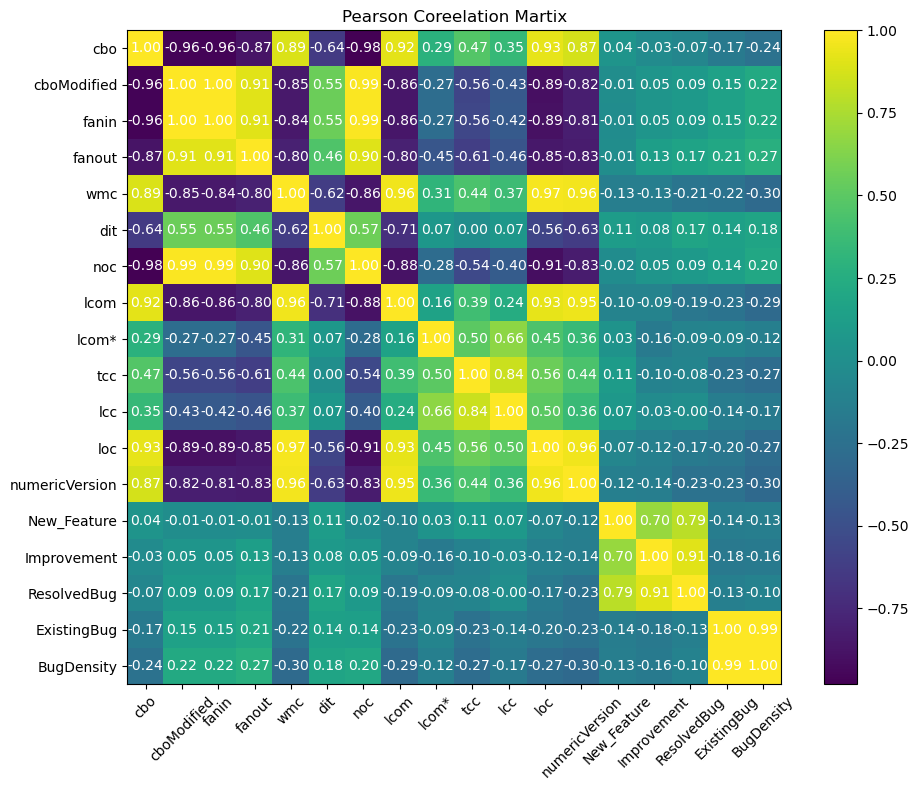

In [10]:
import numpy as np
import matplotlib.pyplot as plt

correlation_matrix = t_mergedMeanBugCountsDf.corr(method='spearman')

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='viridis', interpolation='nearest')

for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='white')

plt.colorbar()
plt.title('Pearson Coreelation Martix')
plt.xticks(np.arange(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(np.arange(len(correlation_matrix)), correlation_matrix.index)
plt.tight_layout()
plt.show()


In [14]:
import statsmodels.api as sm


t_mergedMeanBugCountsDf = mergedMeanCountsDf.drop(columns=['Version'])
t_mergedStdBugCountsDf = mergedStdCountsDf.drop(columns=['Version'])
t_mergedMaxBugCountsDf = mergedMaxCountsDf.drop(columns=['Version'])


df = t_mergedMeanBugCountsDf;

X = df[neededColumnsClass]  # Independent variables
y = df['ExistingBug']  # Dependent variable

# Create and fit the model
model = sm.OLS(y, X).fit()

# Print the coefficients
print(model.params)


cbo             37.671056
cboModified      3.551496
fanin            7.376080
fanout          -3.824583
wmc           -118.247545
dit             49.520151
noc              0.609277
lcom            -2.727571
lcom*         -650.448064
tcc           -395.787622
lcc           -443.702797
loc             31.010298
dtype: float64


In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4)) 
plt.plot(t_mergedMeanBugCountsDf['numericVersion'], t_mergedMeanBugCountsDf['BugDensity'], marker='o', linestyle='-', label='mean')


plt.ylabel('Bug Density')
plt.grid(True)

plt.xlabel('Version')
plt.title('Bug Density-Version')
plt.legend()  
plt.show()


KeyError: 'BugDensity'

<Figure size 400x400 with 0 Axes>

In [16]:
from scipy import stats

veri = t_mergedMeanBugCountsDf['ExistingBug'].values

statistik, p_degeri = stats.shapiro(veri)

# Test istatistiği ve p değeri
print(f"Test İstatistiği: {statistik}, P Değeri: {p_degeri}")

# P değerinin anlamlılık seviyesiyle karşılaştırılması
anlamli_seviye = 0.05
if p_degeri > anlamli_seviye:
    print("Örnek veri normal dağılıma uymaktadır.")
else:
    print("Örnek veri normal dağılıma uymamaktadır.")

Test İstatistiği: 0.8693468570709229, P Değeri: 6.701478469040012e-06
Örnek veri normal dağılıma uymamaktadır.
